## **The tasks in this notebook are given by chatgpt but the solutions and the logic is implemented by me**

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [145]:
df = pd.read_csv("customer_purchase_data.csv")

## 1️⃣ Basic Exploration

* Show first 5 rows
* Check data types
* Check missing values
* Get statistical summary

In [146]:
# data-types
# dataTypes_df = df.info()

# checking missing values
missingValChk_df = df.isnull().sum()

# First five rows
firstFiveRows_df = df.iloc[0:5]
# firstFiveRows_df = df.head()

# statistical summary
statisticalSummary_df = df.describe()

print(statisticalSummary_df)

       Customer_ID         Age    Quantity       Price  Purchase_Amount
count   500.000000  500.000000  500.000000  500.000000       500.000000
mean    250.500000   39.326000    3.032000  247.428000       737.980000
std     144.481833   12.200386    1.444697  141.515746       582.912262
min       1.000000   18.000000    1.000000   11.000000        22.000000
25%     125.750000   29.000000    2.000000  124.500000       295.250000
50%     250.500000   41.000000    3.000000  237.000000       575.000000
75%     375.250000   50.000000    4.000000  376.250000      1040.250000
max     500.000000   59.000000    5.000000  499.000000      2495.000000


---

## 2️⃣ Feature Engineering

* Create `Total_Spent` if not given
* Extract month from `Purchase_Date`
* Create age groups (18–25, 26–35, etc.)


In [147]:
# Total Spent : already given in the csv file as purchase_amount : quantity*price
df["Total_Spent"] = df["Purchase_Amount"]

# Extract month from purchase_date
df["Purchase_Date"] = pd.to_datetime(df["Purchase_Date"])
years = df["Purchase_Date"].dt.year
months = df["Purchase_Date"].dt.month
days = df["Purchase_Date"].dt.day_name()

# Age Groups 
df["Age_Groups"] = np.where((df["Age"] >= 18) & (df["Age"] <= 25), "Young Adult", df["Age"])
df["Age_Groups"] = np.where((df["Age"] > 25) & (df["Age"] <= 34), "Early Adulthood", df["Age_Groups"])
df["Age_Groups"] = np.where((df["Age"] > 34) & (df["Age"] <= 45), "Midlife Adults", df["Age_Groups"])
df["Age_Groups"] = np.where((df["Age"] > 45) & (df["Age"] <= 55), "Late Midlife", df["Age_Groups"])
df["Age_Groups"] = np.where((df["Age"] > 55), "Senior", df["Age_Groups"])

print(df)

     Customer_ID  Age  Gender        City Product_Category  Quantity  Price  \
0              1   56    Male  Faisalabad         Clothing         2    356   
1              2   46  Female      Lahore         Clothing         2    497   
2              3   32    Male  Faisalabad        Groceries         4    267   
3              4   25    Male     Karachi           Sports         2    383   
4              5   38    Male   Islamabad           Sports         5    278   
..           ...  ...     ...         ...              ...       ...    ...   
495          496   56  Female      Multan         Clothing         2    187   
496          497   49  Female     Karachi       Home Decor         2    436   
497          498   41    Male  Faisalabad       Home Decor         5    412   
498          499   40    Male     Karachi           Sports         4    206   
499          500   49    Male   Islamabad       Home Decor         4    316   

     Purchase_Amount Purchase_Date  Total_Spent    

C:\Users\Ahmad Maqsood\AppData\Local\Temp\ipykernel_8316\90245072.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Purchase_Date"] = pd.to_datetime(df["Purchase_Date"])


---

## 3️⃣ Analysis Questions

### A. Spending Behavior

* What is the average spending per customer?
* Which age group spends the most?
* Does gender impact average purchase amount?

Average amount spent per customer : 737.98

Age_Groups
Midlife Adults     103862
Late Midlife        92088
Young Adult         69201
Early Adulthood     63928
Senior              39911
Name: Total_Spent, dtype: int64
Age group 34-45 spends the most.



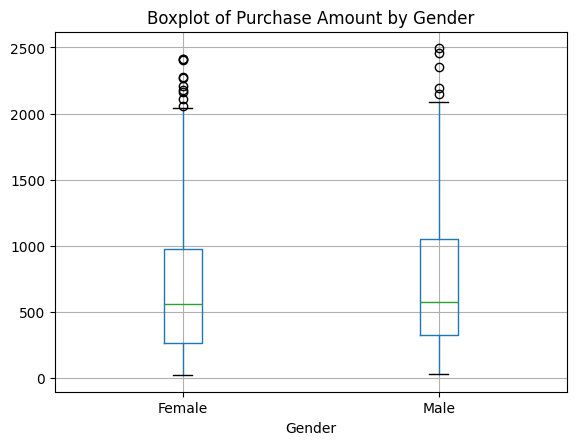

In [148]:
# average spending per customer
avg_spending_perCustomer = np.mean(df["Total_Spent"])
print(f"Average amount spent per customer : {avg_spending_perCustomer}\n")

# Which age group spends the most
max_spend_byAgeGroup = df.groupby(df["Age_Groups"])["Total_Spent"].sum().sort_values(ascending=False)
print(max_spend_byAgeGroup)
print("Age group 34-45 spends the most.\n")

# Does Gender impacts overall average purchase amount?
# gender_impact = df.groupby(df["Gender"])["Total_Spent"].mean()
# print(gender_impact)
df.boxplot(column='Purchase_Amount', by='Gender')
plt.suptitle("")
plt.title("Boxplot of Purchase Amount by Gender")
plt.show()

### B. Product Insights

* Which product category generates the highest revenue?
* Which category sells the most quantity?
* Revenue per category bar chart

Product_Category
Sports         77339
Clothing       77262
Groceries      75695
Home Decor     72759
Electronics    65935
Name: Total_Spent, dtype: int64

Product_Category
Home Decor     339
Sports         310
Groceries      301
Clothing       298
Electronics    268
Name: Quantity, dtype: int64



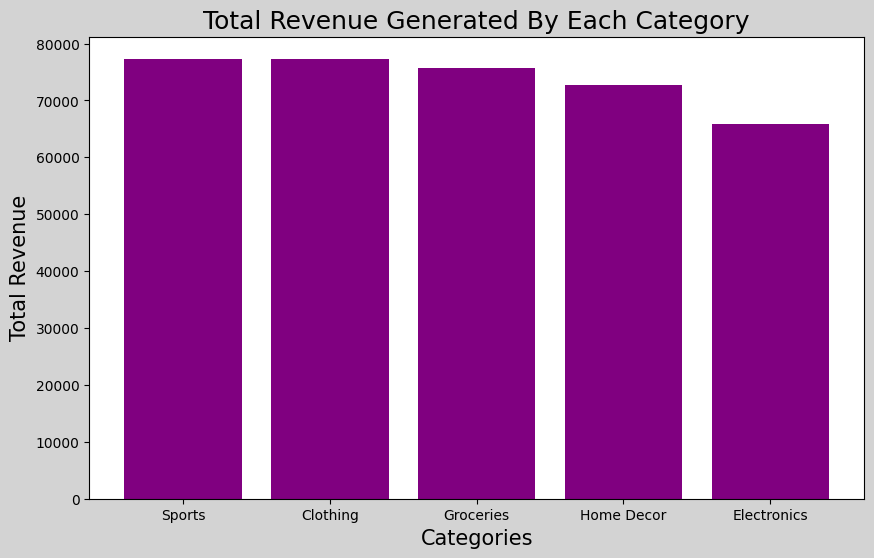

In [149]:
# Which product category generates the highest revenue?
highest_rev_category = df.groupby(df["Product_Category"])["Total_Spent"].sum().sort_values(ascending=False)
print(highest_rev_category, end="\n\n")
# Sports is highest revenue generating category

# Which category sells the most quantity?
highest_quantitySelling_category = df.groupby(df["Product_Category"])["Quantity"].sum().sort_values(ascending=False)
print(highest_quantitySelling_category, end="\n\n")
# Home Decor sells the highest category of products

# Revenue per category bar chart
plt.figure(figsize=(10,6), facecolor="lightgray")
plt.bar(highest_rev_category.index , highest_rev_category.values, color = "purple")
plt.title("Total Revenue Generated By Each Category", fontsize = 18)
plt.xlabel("Categories", fontsize = 15)
plt.ylabel("Total Revenue", fontsize = 15)
plt.show()

### C. Time Trends

* Monthly revenue trend
* Identify highest revenue month

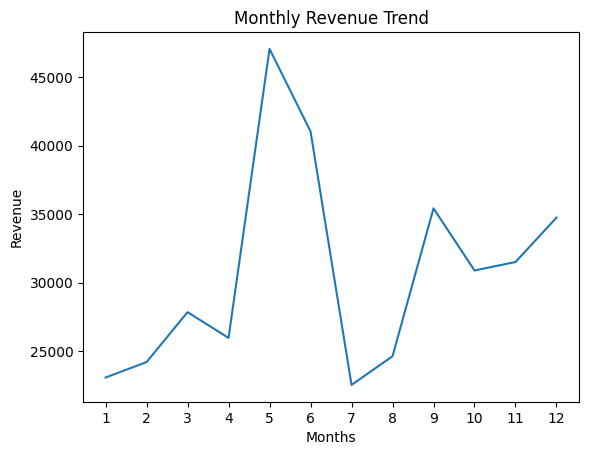

Highest Revenue Generating Month :-
Month : 5
Total Revenue : 47073


In [150]:
# Montly revenue trend
monthly_rev_trend = df.groupby(months)["Total_Spent"].sum()
# print(monthly_rev_trend)
x = monthly_rev_trend.index
y = monthly_rev_trend.values
plt.plot(x, y)
plt.xticks(ticks=x)
plt.title("Monthly Revenue Trend")
plt.xlabel("Months")
plt.ylabel("Revenue")
plt.show()

# Identify highest revenue month
# There are many ways to do so...by analyzing the plot, or making a bar chart for more clear visuals, or :-
highest_rev_month = monthly_rev_trend.nlargest(1)
print("Highest Revenue Generating Month :-")
print(f"Month : {highest_rev_month.index[0]}\nTotal Revenue : {highest_rev_month.values[0]}")

### D. Correlation

* Correlation between Age and Total_Spent
* Correlation between Quantity and Purchase_Amount
* Interpret properly (no “correlation = causation” nonsense)

In [151]:
# Correlation b/w Age and Total_spent
corr_age_totalSpent = df["Age"].corr(df["Total_Spent"])
print(f"Correlation between Age and Total_Spent is : {corr_age_totalSpent}")
print("Age and Total_Spent has a very weak correlation as it is almost equal to 0\n") 
#near 1 : strong : as age goes up, spenditure goes up, -1 : weak : vice versa

# Correlation b/w Quantity and Purchase_Amount
corr_quantity_purchaseAmount = df["Quantity"].corr(df["Purchase_Amount"])
print(f"Correlation between Quantity and Purchase_Amount is : {corr_quantity_purchaseAmount}")
print("Quantity and Purchase_Amount has a moderate correlation. As quantity increases, the amount increases, but not by the same margin, as shown by the correlation.\n") 



Correlation between Age and Total_Spent is : 0.019261418696712218
Age and Total_Spent has a very weak correlation as it is almost equal to 0

Correlation between Quantity and Purchase_Amount is : 0.5735951792816294
Quantity and Purchase_Amount has a moderate correlation. As quantity increases, the amount increases, but not by the same margin, as shown by the correlation.



## 4️⃣ Visualization Requirements (Matplotlib Only)

Create:

* Histogram of Age
* Boxplot of Purchase_Amount by Gender
* Bar chart of Revenue by Category
* Line plot of Monthly Revenue
* Scatter plot of Age vs Total_Spent

Label everything properly. Titles. Axis labels. Clean layout.

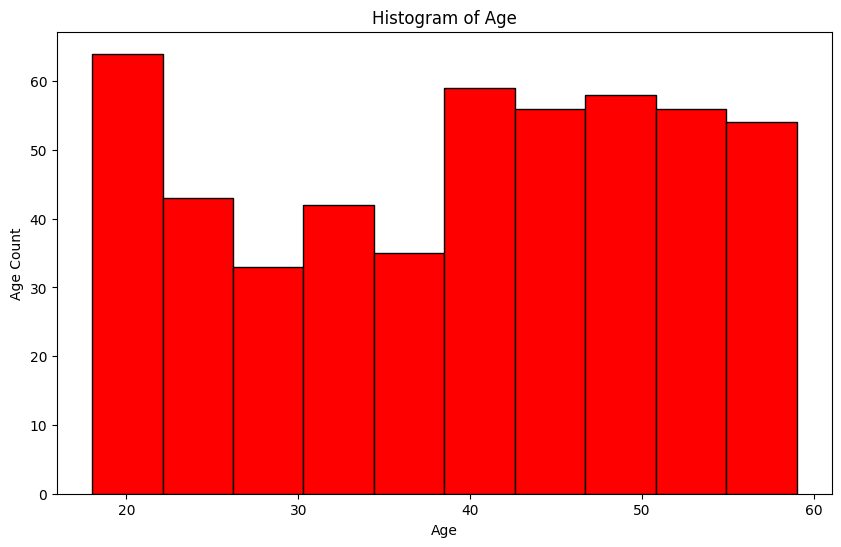

In [152]:
#Histogram of Age
plt.figure(figsize=(10,6))
plt.hist(df["Age"],
          color = "red",
          edgecolor = "black")
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Age Count")
plt.show()

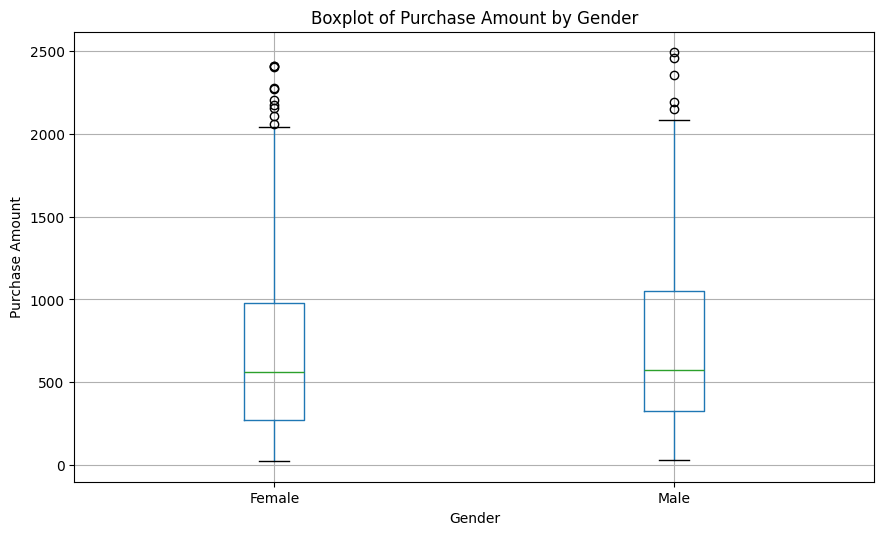

In [153]:
# Boxplot of Purchase_Amount by Gender
df.boxplot(column='Purchase_Amount', by='Gender', figsize=(10,6))
plt.suptitle("")
plt.title("Boxplot of Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Purchase Amount")
plt.show()

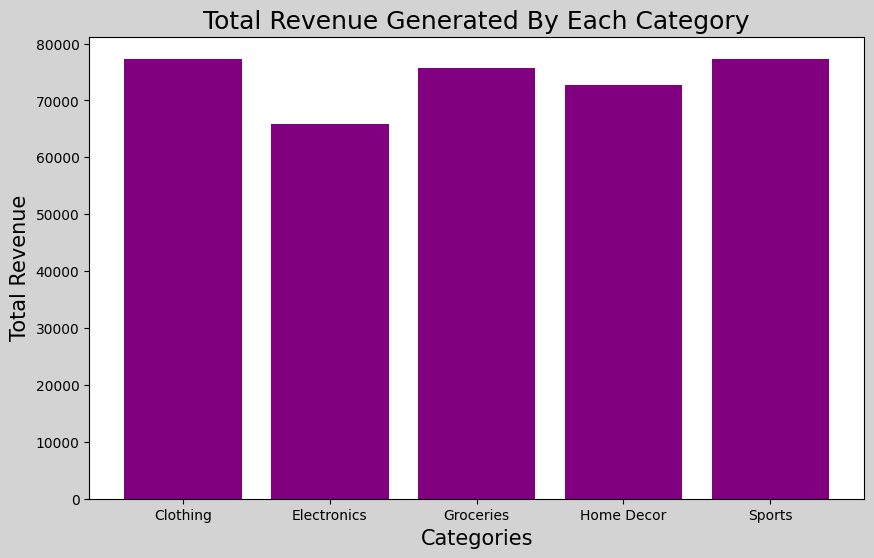

In [154]:
#Bar chart of Revenue by Category
highest_rev_category = df.groupby(df["Product_Category"])["Total_Spent"].sum()
x = highest_rev_category.index
y = highest_rev_category.values

plt.figure(figsize=(10,6), facecolor="lightgray")
plt.bar(x , y,
        color = "purple")
plt.title("Total Revenue Generated By Each Category", fontsize = 18)
plt.xlabel("Categories", fontsize = 15)
plt.ylabel("Total Revenue", fontsize = 15)
plt.show()

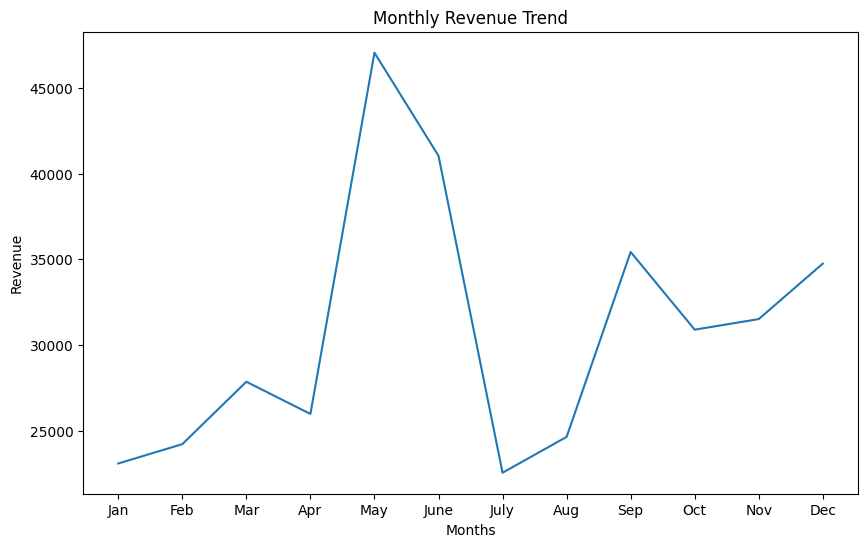

In [173]:
# Line plot of Monthly Revenue
monthly_rev_trend = df.groupby(months)["Total_Spent"].sum()
# print(monthly_rev_trend)
x = monthly_rev_trend.index
y = monthly_rev_trend.values
month_names = ["Jan", "Feb", "Mar", "Apr","May","June","July","Aug", "Sep", "Oct", "Nov", "Dec"]
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.xticks(ticks=x, labels=month_names)
plt.title("Monthly Revenue Trend")
plt.xlabel("Months")
plt.ylabel("Revenue")
plt.show()

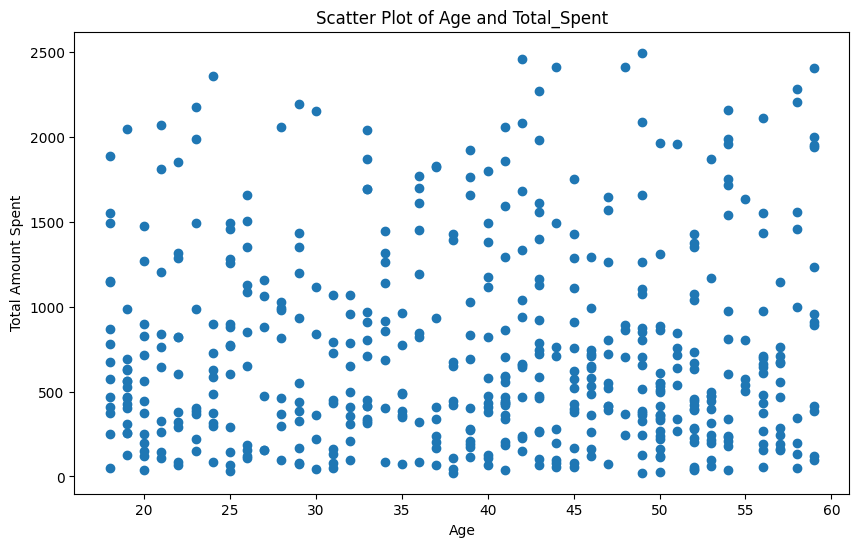

In [172]:
# Scatter plot of Age vs Total_Spent
plt.figure(figsize=(10,6))
plt.scatter(df["Age"], df["Total_Spent"])
plt.xticks(ticks=[20,25,30,35,40,45,50,55,60])
plt.title("Scatter Plot of Age and Total_Spent")
plt.xlabel("Age")
plt.ylabel("Total Amount Spent")
plt.show()